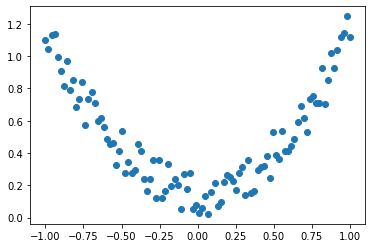

In [4]:
import torch
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.3 * torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [5]:
import torch
import torch.nn.functional as F

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()

        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))   # activation function for hidden layer
        x = self.predict(x)
        return x


net = Net(n_feature=1, n_hidden=10, n_output=1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


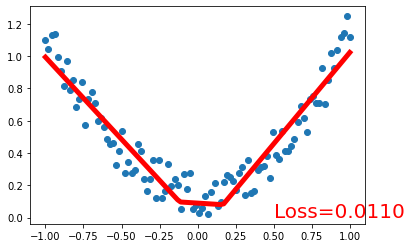

Loss = 0.010938968


In [6]:
from IPython import display
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

epoch = 200
for i in range(epoch):
    prediction = net(x)

    loss = loss_func(prediction, y)

    optimizer.zero_grad() # clear gradients for next train
    loss.backward()       # backpropagation, compute gradients
    optimizer.step()      # apply gradients

    if i % 5 == 0:
        # plot and show learning process
        display.clear_output(wait=True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.show()
        plt.pause(0.1)

print("Loss =", loss.data.numpy())